In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

Q-1. Imagine you have a dataset where you have different Instagram features <br>
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is <br>
to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the <br>
number of likes and Time Since posted.<br>
Dataset This is the Dataset You can use this dataset for this question <br>
Link : https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach

In [2]:
df = pd.read_csv('instagram_reach.csv')

In [3]:
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [7]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [10]:
#other columns are not needed 
df = df[['Followers','Time since posted'	,'Likes']]

In [11]:
df.shape

(100, 3)

In [12]:
df.dtypes

Followers             int64
Time since posted    object
Likes                 int64
dtype: object

In [13]:
df.isnull().sum()

Followers            0
Time since posted    0
Likes                0
dtype: int64

In [17]:
#converting Time since posted to float
df['Time since posted'][0].split(' ')[0]

'11'

In [19]:
Time_since_posted = []
for i in df['Time since posted']:
    Time_since_posted.append(int(i.split(' ')[0]))

df['Time_since_posted'] = Time_since_posted
df = df.drop('Time since posted',axis = 1)

C:\Users\KIIT\AppData\Local\Temp/ipykernel_11844/2087639824.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_since_posted'] = Time_since_posted


In [20]:
df.head()

,Followers,Likes,Time_since_posted
0,1600,139,11
1,880,23,2
2,255,25,2
3,340,49,3
4,304,30,3


#### i woulde be predicting likes 

In [21]:
X = df[['Followers','Time_since_posted']]
Y = df['Likes']

In [22]:
from sklearn.model_selection import train_test_split
X_train,x_test,Y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [23]:
print(X_train.shape)
print(x_test.shape)

(80, 2)
(20, 2)


In [24]:
#scaling our data 

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [27]:
#model building 
#as this is a regression type problem we will use regressinon models 

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [29]:
lr.fit(X_train,Y_train)

LinearRegression()

In [33]:
print('Training score: ', lr.score(X_train,Y_train))

Training score:  0.5316649728255584


In [34]:
#prediction 
y_pred = lr.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [37]:
print('Mean Absolut Error is: ',mae)

print('Mean Squared Error is: ',mse)

print('R2 score is: ',r2)



Mean Absolut Error is:  31.69780161605204
Mean Squared Error is:  3885.9269377258547
R2 score is:  -0.1970362899574145


In [38]:
#Linear Regression is not preforming well 

In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr

GradientBoostingRegressor()

In [40]:
gbr.fit(X_train,Y_train)

GradientBoostingRegressor()

In [41]:
y_pred = gbr.predict(x_test)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [43]:
print('Mean Absolut Error is: ',mae)

print('Mean Squared Error is: ',mse)

print('R2 score is: ',r2)



Mean Absolut Error is:  31.443001669822696
Mean Squared Error is:  4221.871997165506
R2 score is:  -0.3005221336250017


Text(0, 0.5, 'Likes')

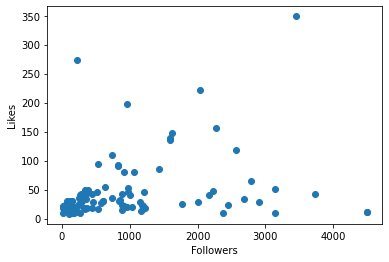

In [47]:
plt.scatter(df['Followers'],df['Likes'])
plt.xlabel('Followers')
plt.ylabel('Likes')

Text(0, 0.5, 'Likes')

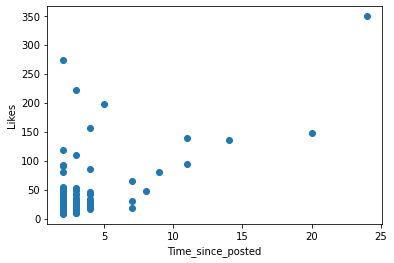

In [48]:
plt.scatter(df['Time_since_posted'],df['Likes'])
plt.xlabel('Time_since_posted')
plt.ylabel('Likes')

In [49]:
#The data is not linear that why liner Regression model is having bad accuracy 
